# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **economic activity or measures** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **economic activity or measures**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **economic activity or measures**?  For this category you might look at the inputs or outputs to the given economy, or major changes in the economy compared to other regions.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

### 1 Region and Domain
    All the States in the US
    Economic Activity

### 2 Research Question
    Is there a correlation between Covid-19 infections per state and the mean wage gap in 2019 between white and black races?
    
#### Caveats
    - The Covid-19 infection began in the USA in 2020, and the wagegap data is from the previous year
    - Only the 50 States of the USA are considered, territories such as Puerto Rico are not.

### 3 Data Links

* Income per state in 2019: https://data.census.gov/cedsci/table?q=United%20States&t=Income%20and%20Earnings&g=0100000US.04000.001&tid=ACSST1Y2019.S1902
* Covid cases per 100k people per state up to date: https://covid.cdc.gov/covid-data-tracker/?CDC_AA_refVal=https%3A%2F%2Fwww.cdc.gov%2Fcoronavirus%2F2019-ncov%2Fcases-updates%2Fcases-in-us.html#cases_casesper100k
* USA State names and code: https://worldpopulationreview.com/states/state-abbreviations
    

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib notebook

In [34]:
STATE = 'State'
CASE_RATE = 'Case Rate per 100000'
DEATH_RATE = 'Death Rate per 100000'

WHITE = 'White'
BLACK = 'Black or African American'
AMERICAN_INDIAN = 'American Indian and Alaskan Native'
ASIAN = 'Asian'
NATIVE_HAWAIIAN = 'Native Hawaiian and Other Pacific Islander'
OTHER_RACE = 'Some other race'
TWO_OR_MORE_RACES = 'Two or more races'
HISPANIC_ORIGIN = 'Hispanic or Latino origin'
WHITE_ALONE = 'White alone, not Hispanic or Latino'

MAX_RACE = 'Highest paid race'
MAX_VAL = 'Highest mean wage'
MIN_RACE = 'Lowest paid race'
MIN_VAL = 'Lowest mean wage'
DIFF = 'Mean wage difference in dollars'

In [35]:
def GetStatesDF():
    states = pd.read_csv('data_assignment4/data_state_name_and_code.csv')
    states = states[states[STATE] != 'District of Columbia']
    return states
states = GetStatesDF()
print(states.shape)
states.head()

(50, 3)


,State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [36]:
def GetCovidDF():
    covid_cases = pd.read_csv('data_assignment4/data_united_states_covid19_cases_and_deaths_by_state.csv', skiprows=2)
    covid_cases = covid_cases.rename(columns={'State/Territory' : STATE})
    covid_cases = covid_cases.filter([STATE, CASE_RATE, DEATH_RATE])
    covid_cases = covid_cases[covid_cases[STATE].isin(states[STATE])]
    covid_cases = covid_cases.sort_values([STATE])
    return covid_cases

covid_cases = GetCovidDF()
print(covid_cases.shape)
covid_cases.head()

(50, 3)


,State,Case Rate per 100000,Death Rate per 100000
1,Alabama,10735,221
0,Alaska,8856,46
4,Arizona,11808,237
2,Arkansas,11093,189
5,California,9191,152


In [37]:
def GetIncomeDF():
    incomes = pd.read_csv('data_assignment4/data_income_per_state_2019.csv').iloc[1:]
    incomes = incomes.rename(columns={
            'NAME' : STATE,
            'S1902_C03_020E': WHITE,
            'S1902_C03_021E': BLACK,
            'S1902_C03_022E': AMERICAN_INDIAN,
            'S1902_C03_023E': ASIAN,
            'S1902_C03_024E': NATIVE_HAWAIIAN,
            'S1902_C03_025E': OTHER_RACE,
            'S1902_C03_026E': TWO_OR_MORE_RACES,
            'S1902_C03_027E': HISPANIC_ORIGIN,
            'S1902_C03_028E': WHITE_ALONE
        })
    incomes = incomes.filter([
            STATE,
            WHITE,
            BLACK,
            AMERICAN_INDIAN,
            ASIAN,
            NATIVE_HAWAIIAN,
            OTHER_RACE,
            TWO_OR_MORE_RACES,
            HISPANIC_ORIGIN,
            WHITE_ALONE
        ])
    incomes = incomes[incomes[STATE].isin(states[STATE])]
    incomes = incomes.sort_values([STATE])
    return incomes

incomes = GetIncomeDF()
print(incomes.shape)
incomes.head()

(50, 10)


,State,White,Black or African American,American Indian and Alaskan Native,Asian,Native Hawaiian and Other Pacific Islander,Some other race,Two or more races,Hispanic or Latino origin,"White alone, not Hispanic or Latino"
1,Alabama,32358,20779,23428,33598,15316,14445,16958,16670,32939
2,Alaska,43918,33007,21942,32902,16484,23855,21551,26946,45030
3,Arizona,34447,24494,17156,41973,26635,21260,19182,19826,40992
4,Arkansas,29663,18986,23314,35522,11700,16134,16195,18867,30250
5,California,43758,30854,28285,47171,32222,20803,27713,22265,56804


In [38]:
def GetBiggestWageGap(row):
    temp_row = row[row.str.isnumeric()]
    max_col_id = WHITE_ALONE #temp_row.idxmax()
    max_col_val = float(temp_row[max_col_id])
    min_col_id = BLACK #temp_row.idxmin()
    min_col_val = float(temp_row[min_col_id])
    difference = max_col_val - min_col_val
    
    return pd.Series([row[STATE], max_col_id, max_col_val, min_col_id, min_col_val, difference])
    
wage_gaps = pd.DataFrame()
wage_gaps[[STATE, MAX_RACE, MAX_VAL, MIN_RACE, MIN_VAL, DIFF]] = incomes.apply(GetBiggestWageGap, axis=1)

print(wage_gaps.shape)
wage_gaps.head()

(50, 6)


,State,Highest paid race,Highest mean wage,Lowest paid race,Lowest mean wage,Mean wage difference in dollars
1,Alabama,"White alone, not Hispanic or Latino",32939.0,Black or African American,20779.0,12160.0
2,Alaska,"White alone, not Hispanic or Latino",45030.0,Black or African American,33007.0,12023.0
3,Arizona,"White alone, not Hispanic or Latino",40992.0,Black or African American,24494.0,16498.0
4,Arkansas,"White alone, not Hispanic or Latino",30250.0,Black or African American,18986.0,11264.0
5,California,"White alone, not Hispanic or Latino",56804.0,Black or African American,30854.0,25950.0


In [39]:
highest_paid_races = wage_gaps.pivot_table(index=[MAX_RACE], aggfunc='size')
highest_paid_races

Highest paid race
White alone, not Hispanic or Latino    50
dtype: int64

In [40]:
lowest_paid_races = wage_gaps.pivot_table(index=[MIN_RACE], aggfunc='size')
lowest_paid_races

Lowest paid race
Black or African American    50
dtype: int64

In [41]:
join_result = wage_gaps.set_index(STATE).join(covid_cases.set_index(STATE))
print(join_result.shape)
join_result.head()

(50, 7)


,Highest paid race,Highest mean wage,Lowest paid race,Lowest mean wage,Mean wage difference in dollars,Case Rate per 100000,Death Rate per 100000
State,,,,,,,
Alabama,"White alone, not Hispanic or Latino",32939.0,Black or African American,20779.0,12160.0,10735,221
Alaska,"White alone, not Hispanic or Latino",45030.0,Black or African American,33007.0,12023.0,8856,46
Arizona,"White alone, not Hispanic or Latino",40992.0,Black or African American,24494.0,16498.0,11808,237
Arkansas,"White alone, not Hispanic or Latino",30250.0,Black or African American,18986.0,11264.0,11093,189
California,"White alone, not Hispanic or Latino",56804.0,Black or African American,30854.0,25950.0,9191,152


In [53]:
class AnnotateCallback:
    def __init__(self, fig, annotations):
        self.annotations = annotations
        self.prev = 0
        self.curr = 0
        self.cid = fig.canvas.mpl_connect('motion_notify_event', self)
        
        for i in range(len(self.annotations)):
            self.annotations[i].set_visible(False)
        self.annotations[self.prev].set_visible(True)
        
    def __call__(self, event):
        y = event.ydata
        x = event.xdata
        click_point = np.array((x, y))

        self.annotations[self.prev].set_visible(False)
        self.curr = self.GetClosestStateIndex(click_point)
        
        self.annotations[self.curr].set_visible(True)
        self.prev = self.curr
        

    def GetClosestStateIndex(self, click_point):
        best_so_far = 0
        best_distance = 100000
        for i in range(len(self.annotations)):
            current_point = np.array(self.annotations[i].xy)
            dist = np.linalg.norm(click_point - current_point)
            if dist < best_distance:
                best_distance = dist
                best_so_far = i
        return best_so_far

<IPython.core.display.Javascript object>


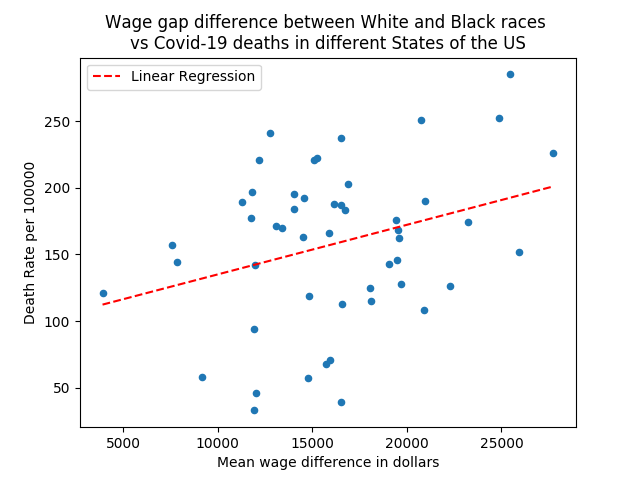

In [54]:
join_result = join_result.sort_values([DIFF])
join_result.plot(DIFF, DEATH_RATE, kind = 'scatter');
d = np.polyfit(join_result[DIFF], join_result[DEATH_RATE], 1)
f = np.poly1d(d)
plt.plot(join_result[DIFF], f(join_result[DIFF]),"r--", label='Linear Regression')
plt.title('Wage gap difference between White and Black races \nvs Covid-19 deaths in different States of the US')

plt.legend()

fig = plt.gcf()

z = join_result[DIFF].tolist()
y = join_result[DEATH_RATE].tolist()
n = join_result.index.tolist()
ann_list = list()
for i, txt in enumerate(n):
    ann_list.append(plt.annotate(txt, (z[i], y[i])))
    ann_list[-1].set_visible(False)


annotate_interactive = AnnotateCallback(fig, ann_list)

### 4 Image
Please run the cells above and interact with the Graph by hovering over it.

### 5 Discussion

- One thing to notice is how in all states the Wage gap is positive for (White income - Black income).
- The graph shows a slight positive correlation (Spurious perhaps) between the Mean wage gap difference and the amount of COVID deaths per 100k citizens. While there's most likely no direct cause-effect among these two variables, it could be that the same issue is causing both numbers to rise in certain States.
- The previously mentioned issue cannot be pinpointed to a single cause, and further analysis is needed. Nonetheless, Maybe the same people and the same ideals that in some way influence the higher wage gap, influence the least amount of attention given to COVID.
- One caveat is that the wage dataset is from 2019 while COVID cases are from 2020 until April 28th, 2021. This experiment should be rerun when the 2020 income dataset is available.
- Some further analysis would be to correlate the races of the people that have died due to COVID.

### 6 Personal opinion
This graph was made out of curiosity, I simply thought that the states with higher wage gaps would have worst results against COVID, because having a high wage gap in my mind signifies that people with money and the government don't care much about others who are not 'like them'. I know this is an over generalization and the issue is deeper and not as simple. 

I hope this doesn't offend anybody, it was never the intention.
